<a href="https://colab.research.google.com/github/subshr4/subshr4/blob/main/Quiz29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Subani Shrestha


Standard error of the estimate refers to one standard deviation of the distribution of the parameter of interest, that are you estimating. Standard error estimate is a measure of statistical accuracy. It is enough for a statistician to see the standard error to get a notion about the p-value and also about the confidence interval.

Confidence interval uses estimated standard errors to draw an interval with a certain level of confidence around your estimated effect. This level of confidence is expressed as a % of how often the true percentage of the population lies within the confidence interval.Confidence intervals are the quantiles of the distribution of the parameter of interest, that you are estimating, at least in a frequentist paradigm.

Here, I imported pandas first then imported activity dataset using read_csv function. Then I graphed the average calories by workout_type, and lastly included the 95% confidence interval by using standard error as 95%.

In [20]:
import pandas as pa

df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/Activity_Dataset_V1.csv')

dfgrouped = df.groupby('workout_type').calories.agg(['mean','std', 'count'])
dfgrouped



,mean,std,count
workout_type,,,
Cricket,307.548387,149.950609,93
Freestyle,278.552083,163.703768,96
Indoor Cycling,280.450000,156.633322,80
Open Water,296.747253,160.068499,91
Outdoor Cycling,299.129412,158.731263,85
Outdoor Running,301.469136,165.725080,81
Pool Swimming,283.414894,157.576703,94
Trail Run,267.966667,155.748533,90
Treadmill,278.142857,146.963352,98


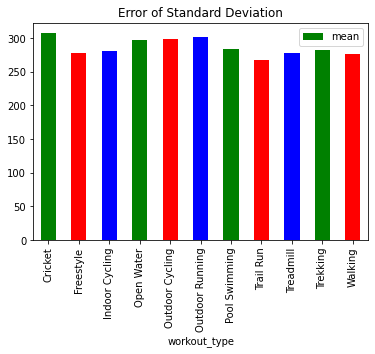

In [24]:
dfgrouped.plot.bar(y = 'mean', color = ['green','red', 'blue'], title = "Error of Standard Deviation")

In [29]:
import numpy as np
from scipy.stats import t

def SE(std,n):
  return std/np.sqrt(n)





dfgrouped['SE'] = dfgrouped.apply(lambda x: SE(x['std'],x['count']), axis = 1)


dfgrouped.loc[:,'95%'] = dfgrouped.loc[:,'SE']*t.ppf(.975,49)

dfgrouped

,mean,std,count,SE,95%
workout_type,,,,,
Cricket,307.548387,149.950609,93,15.549154,31.247194
Freestyle,278.552083,163.703768,96,16.707946,33.575874
Indoor Cycling,280.450000,156.633322,80,17.512138,35.191958
Open Water,296.747253,160.068499,91,16.779738,33.720146
Outdoor Cycling,299.129412,158.731263,85,17.216823,34.598501
Outdoor Running,301.469136,165.725080,81,18.413898,37.004113
Pool Swimming,283.414894,157.576703,94,16.252796,32.661216
Trail Run,267.966667,155.748533,90,16.417337,32.991874
Treadmill,278.142857,146.963352,98,14.845540,29.833230


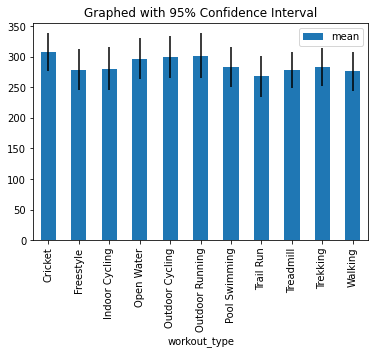

In [32]:
dfgrouped.plot.bar(y = 'mean',yerr = '95%', title = 'Graphed with 95% Confidence Interval' )